In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [5]:
df['target'] = iris.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df['flower_names'] = df.target.apply(lambda x:iris.target_names[x])
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [10]:
df0.head(2)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


Text(0, 0.5, 'sepal width (cm)')

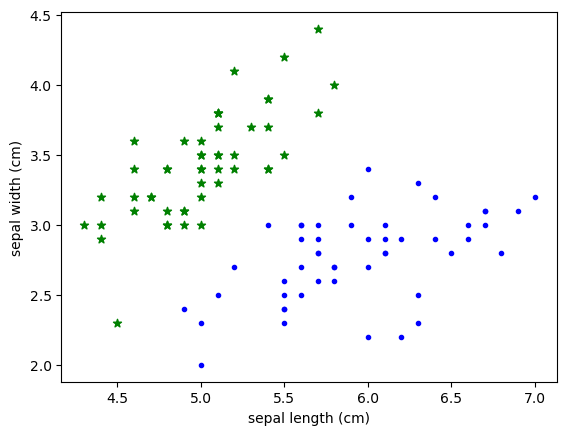

In [11]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(['target', 'flower_names'], axis='columns')
X.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [14]:
y = df.target
y.head(2)

0    0
1    0
Name: target, dtype: int32

In [15]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
len(X_train)

120

In [17]:
len(X_test)

30

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
model.score(X_test, y_test)

0.9666666666666667

In [29]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]], dtype=int64)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(58.222222222222214, 0.5, 'Truth')

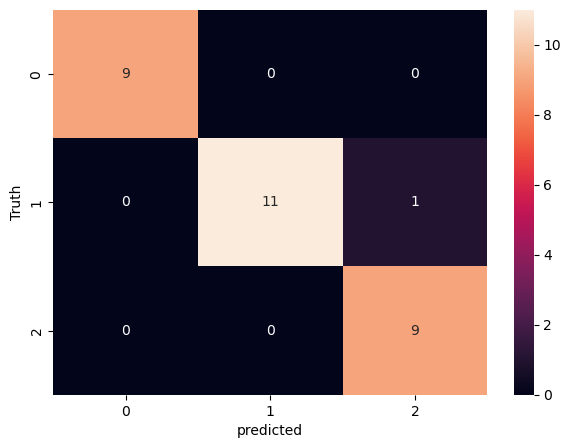

In [31]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm , annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')